# Polynomial regression

- Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

            - y = 0.8x^2 + 0.9x + 2

In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

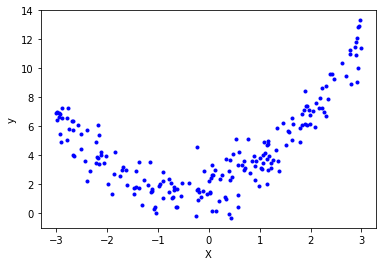

In [3]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

- Train test split

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

- Applying linear regression

                - To check whether we can form linear line across the data

In [5]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

- Accuracy score is much lower than expected

In [6]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.17851538081119123

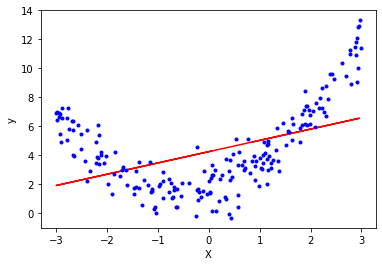

In [7]:
plt.plot(X_train,lr.predict(X_train),color='r') # linear line across the dataset
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

- Applying Polynomial Linear Regression

    - Degree 2
    - include bias = false will remove the lines of co-ordinate. so we will make it true for better    understanding

In [8]:
poly = PolynomialFeatures(degree=2,include_bias=True) 
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [9]:
print(X_train[0])
print(X_train_trans[0])

[0.8579225]
[1.         0.8579225  0.73603101]


In [10]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [11]:
y_pred = lr.predict(X_test_trans)

- Now results are better as compared to previous one

In [12]:
r2_score(y_test,y_pred)

0.9138543139467454

In [13]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

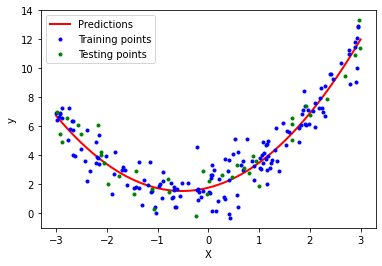

In [14]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [15]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

- If we pass higher degree in a function then there is chance of overfitting. so we take degrees in lower forms.

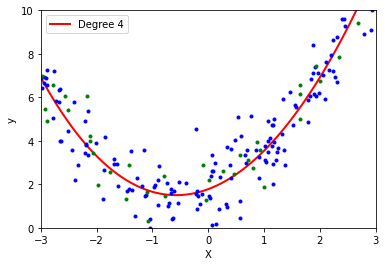

In [16]:
polynomial_regression(4)

In [17]:
poly.powers_ 

array([[0],
       [1],
       [2]], dtype=int64)